# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


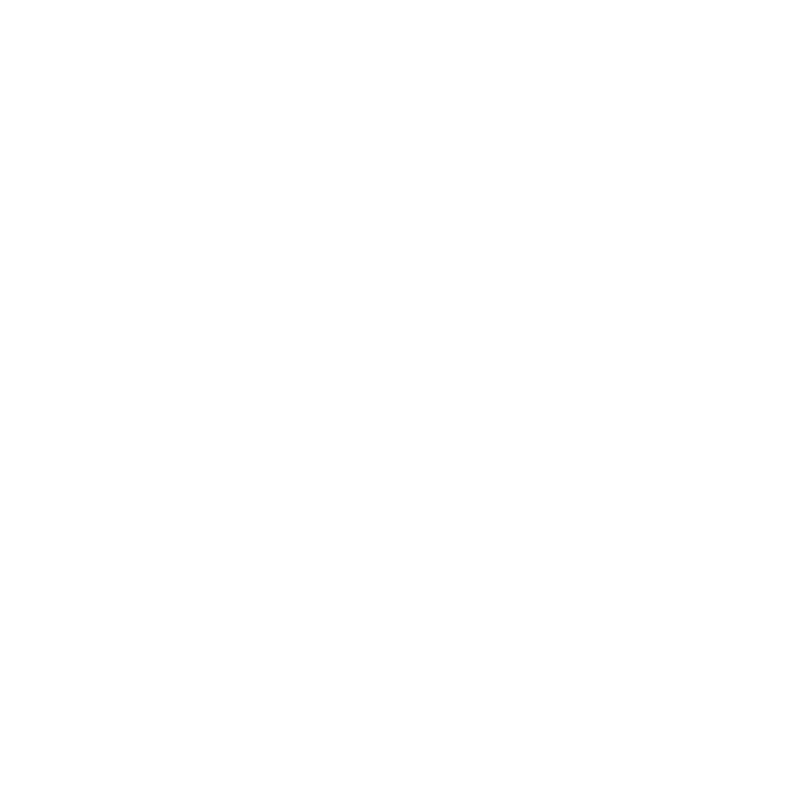

In [19]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]
    
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
get_ipython().magic('matplotlib notebook')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d25/391a2922ad597ba080f4b99dea6d62842562d64845ef5df1a384561e.csv', parse_dates=["Date"])
df['year'] = pd.DatetimeIndex(df['Date']).year
df=df[~((pd.DatetimeIndex(df['Date']).month == 2) & (pd.DatetimeIndex(df['Date']).day == 29))]
df_2014_2004=df[(df['Date'] > '2003-12-31') & (df['Date'] <= '2014-12-31')]

df_2014_2004.head()

,ID,Date,Element,Data_Value,year
0,CHM00052836,2007-07-09,TMAX,246,2007
2,IN022021900,2011-05-13,TMAX,400,2011
3,CHM00055299,2012-05-13,TMIN,3,2012
4,CHM00052836,2014-06-12,TMIN,52,2014
5,CHM00055228,2006-04-12,TMAX,18,2006


In [162]:
df_2015 = df[pd.DatetimeIndex(df['Date']).year==2015]
high_2015 = df_2015.groupby('Date', as_index=True)['Data_Value'].agg({"MAX":"max"})

df_2015 = df[pd.DatetimeIndex(df['Date']).year==2015]
low_2015 = df_2015.groupby('Date', as_index=True)['Data_Value'].agg({"MIN":"min"})

high = df_2014_2004.groupby('Date', as_index=True)['Data_Value'].agg({"MAX":"max"})
print(high)

low = df_2014_2004.groupby('Date', as_index=True)['Data_Value'].agg({"MIN":"min"})
print(low)

            MAX
Date           
2005-01-01  268
2005-01-02  266
2005-01-03  277
2005-01-04  249
2005-01-05  243
2005-01-06  263
2005-01-07  235
2005-01-08  229
2005-01-09  275
2005-01-10  271
2005-01-11  250
2005-01-12  238
2005-01-13  236
2005-01-14  256
2005-01-15  260
2005-01-16  288
2005-01-17  267
2005-01-18  242
2005-01-19  219
2005-01-20  220
2005-01-21  245
2005-01-22  275
2005-01-23  252
2005-01-24  222
2005-01-25  235
2005-01-26  240
2005-01-27  284
2005-01-28  250
2005-01-29  234
2005-01-30  253
...         ...
2014-12-02  318
2014-12-03  318
2014-12-04  365
2014-12-05  321
2014-12-06  312
2014-12-07  302
2014-12-08  308
2014-12-09  304
2014-12-10  304
2014-12-11  284
2014-12-12  287
2014-12-13  265
2014-12-14  265
2014-12-15  276
2014-12-16  246
2014-12-17  254
2014-12-18  260
2014-12-19  248
2014-12-20  259
2014-12-21  270
2014-12-22  279
2014-12-23  272
2014-12-24  258
2014-12-25  252
2014-12-26  260
2014-12-27  265
2014-12-28  265
2014-12-29  261
2014-12-30  258
2014-12-

<IPython.core.display.Javascript object>


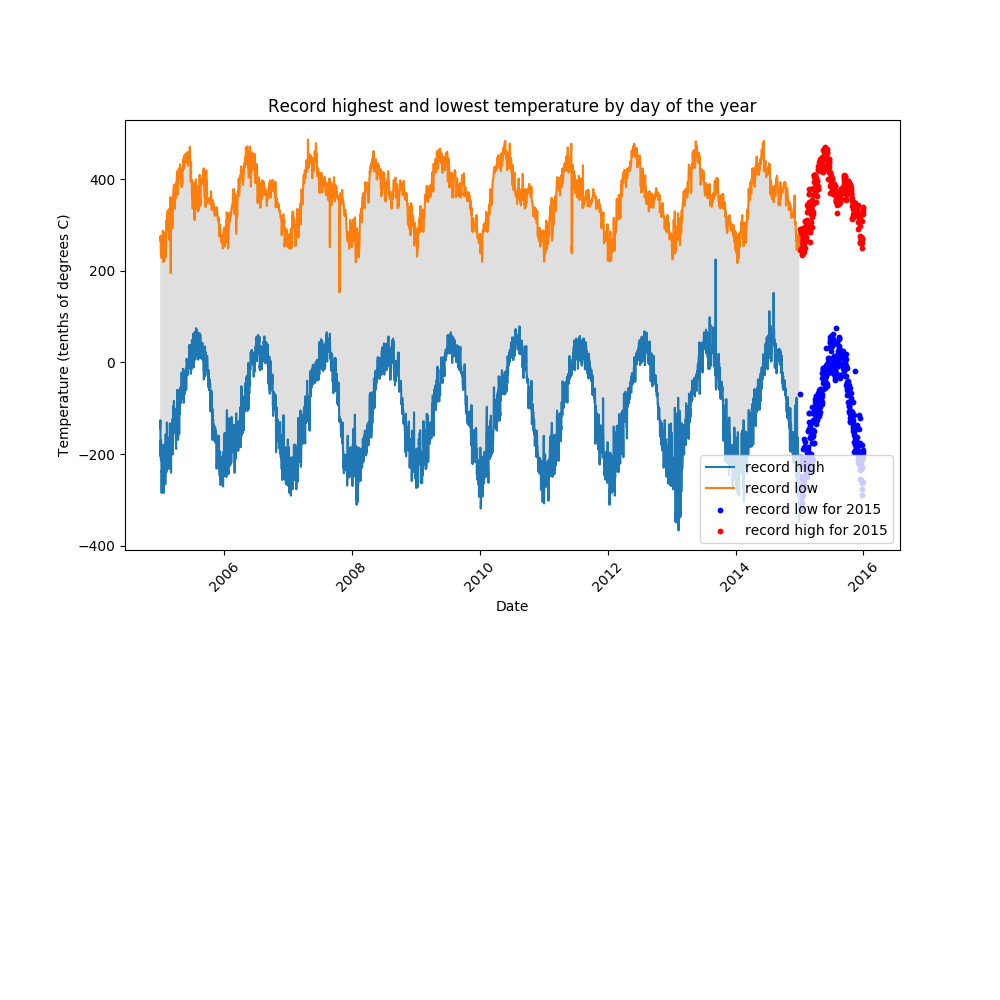

In [223]:
plt.figure(figsize=(10,10))

plt.plot(low.index, low['MIN'], low.index, high['MAX'])

In [224]:
plt.xlabel('Date')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title('Record highest and lowest temperature by day of the year')

In [225]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.subplots_adjust(bottom=0.45)
plt.gca().fill_between(low.index, low['MIN'], high['MAX'], facecolor='grey', alpha=0.25, label = '_nolegend_')


In [226]:
record_high2015 = high_2015[high_2015 >= high.reindex_like(high_2015)]
print(record_high2015.head())

x = [n for n in range(0,365) if (high_2015['MAX'].iloc[n] >= high['MAX'].iloc[n]) ]
print(x)

record_low2015 = low_2015[low_2015 <= low.reindex_like(low_2015)]
print(record_low2015.head())

y = [n for n in range(0,365) if (low_2015['MIN'].iloc[n] <= low['MIN'].iloc[n]) ]
print(y)

            MAX
Date           
2015-01-01  NaN
2015-01-02  NaN
2015-01-03  NaN
2015-01-04  NaN
2015-01-05  NaN
[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 37, 38, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 60, 66, 67, 69, 70, 71, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 98, 99, 100, 101, 107, 108, 109, 110, 112, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 158, 159, 160, 173, 174, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 228, 229, 230, 231, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,

In [227]:
plt.scatter(low_2015.index, low_2015, s=10, c='blue')
plt.scatter(high_2015.index, high_2015, s=10, c='red')
plt.legend(['record high', 'record low',
            'record low for 2015', 'record high for 2015'])

In [229]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')